#                                         2016-2019 Public Schools Comparison by California's Smarter Balanced Assessment Results

## California Placer County High Schools

In [116]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [313]:
publicschools = pd.read_csv("pubschls.csv", na_values="*", low_memory=False)
results16 = pd.read_csv("data2016.csv", na_values="*")
results17 = pd.read_csv("data2017.csv", na_values="*")
results18 = pd.read_csv("data2018.csv", na_values="*")
results19 = pd.read_csv("data2019.csv", na_values="*")

### Magnet School Effect in All Elementary and High School Grades in 2018

In [138]:
df2018 = publicschools.merge(results18, on="CDSCode", how="inner")
df2016 = df2016.dropna()

In [139]:
df2018.columns

Index(['CDSCode', 'County', 'District', 'School', 'EILCode', 'EILName',
       'OpenDate', 'Charter', 'Magnet', 'YearRoundYN', 'FundingType',
       'Test Id', 'Grade', 'Students Tested', 'Mean Scale Score',
       'Subgroup ID', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met'],
      dtype='object')

In [140]:
df2018["EILName"].unique()

array(['Elementary', 'Elementary-High Combination',
       'Intermediate/Middle/Junior High', 'High School'], dtype=object)

In [142]:
df2018.loc[df2018["EILName"] == 'Elementary']["Grade"].unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [143]:
df2018.loc[df2018["EILName"] == 'High School']["Grade"].unique()

array([11,  7,  8], dtype=int64)

In [146]:
# Magnet elementary school effect on English Language Arts/Literacy Test Results
dfl = df2018.loc[(df2018["Test Id"] == 1)]
dflelementary = dfl[(dfl["Grade"] == 3) | (dfl["Grade"] == 4) | (dfl["Grade"] == 5) | (dfl["Grade"] == 6) | (dfl["Grade"] == 7) | (dfl["Grade"] == 8)]
MagnetGroups_df = dflelementary.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2507.317974,30.500029,22.425125,23.085225,23.989295
1,Y,2558.153435,33.743145,33.349282,17.167496,15.739985


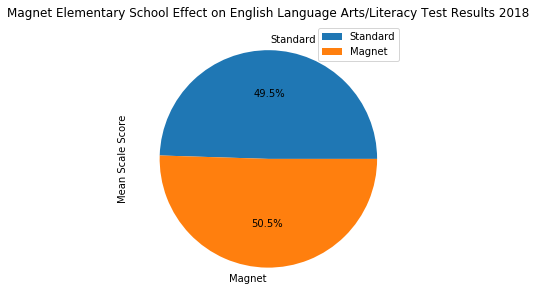

In [178]:
elem_magnet_lit = dflelementary.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
elem_magnet_lit.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet Elementary School Effect on English Language Arts/Literacy Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')



In [147]:
# Magnet elementary school effect on Math Test Results

dfm = df2018.loc[(df2018["Test Id"] == 2)]
dfmelementary = dfm[(dfm["Grade"] == 3) | (dfm["Grade"] == 4) | (dfm["Grade"] == 5) | (dfm["Grade"] == 6) | (dfm["Grade"] == 7) | (dfm["Grade"] == 8)]


MagnetGroups_df = dfmelementary.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2498.485643,22.624759,19.747975,28.170556,29.456391
1,Y,2551.909327,23.208456,34.971957,20.973043,20.846315


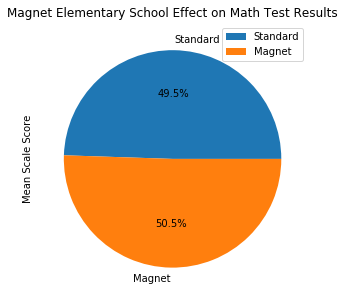

In [179]:
elem_magnet_math = dfmelementary.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
elem_magnet_math.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet Elementary School Effect on Math Test Results", figsize=(5, 5), autopct='%1.1f%%')



In [149]:
# Magnet High school effect on English Language Arts/Literacy Test Results

dfl = df2018.loc[(df2018["Test Id"] == 1)]
dflhigh = dfl[(dfl["Grade"] == 7) | (dfl["Grade"] == 8) | (dfl["Grade"] == 11)]


MagnetGroups_df = dflhigh.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2567.390511,35.128874,18.055548,25.125452,21.689734
1,Y,2584.202268,34.916984,25.111451,19.551293,20.420045


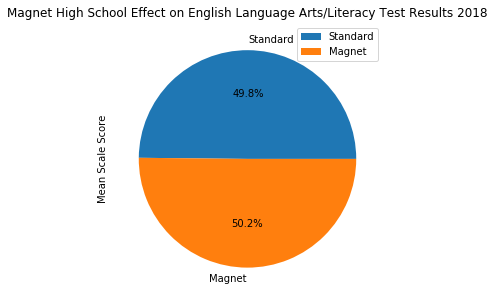

In [183]:
high_magnet_l = dflhigh.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
high_magnet_l.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet High School Effect on English Language Arts/Literacy Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')

In [148]:
# Magnet High school effect on Math Test Results

dfm = df2018.loc[(df2018["Test Id"] == 2)]
dfmhigh = dfm[(dfm["Grade"] == 7) | (dfm["Grade"] == 8) | (dfm["Grade"] == 11)]


MagnetGroups_df = dfmhigh.groupby('Magnet', as_index=False)[[ 'Mean Scale Score', 'Percentage Standard Met','Percentage Standard Exceeded',
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
MagnetGroups_df

,Magnet,Mean Scale Score,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Nearly Met,Percentage Standard Not Met
0,N,2539.377285,18.634604,16.344410,25.414472,39.606307
1,Y,2567.993636,20.217523,24.439273,22.407068,32.936091


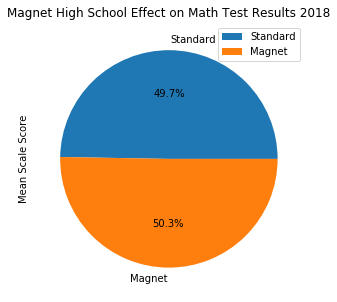

In [182]:
high_magnet_m = dfmhigh.groupby('Magnet', as_index=False)["Mean Scale Score"].mean()
labels = ["Magnet", "Standard"]
high_magnet_m.plot(kind="pie", y="Mean Scale Score", labels=["Standard", "Magnet"], title="Magnet High School Effect on Math Test Results 2018", figsize=(5, 5), autopct='%1.1f%%')



In [ ]:
# A mean scale score is the average performance of a group of students on an assessment. 
# Specifically, a mean scale score is calculated by adding all individual student scores and dividing by the number of total scores.

### High School Numbers in 2019

In [171]:
df2019 = publicschools.merge(results19, on="CDSCode", how="inner")
df2019 = df2019.dropna()

In [200]:
df2019["EILCode"].unique()

array(['ELEM', 'INTMIDJR', 'ELEMHIGH', 'HS'], dtype=object)

In [245]:
high19 = df2019.loc[(df2019["Grade"] == 7) | (df2019["Grade"] == 8) | (df2019["Grade"] == 11)]

In [246]:
#high19 = df2019.loc[(df2019["EILCode"] == "HS")]

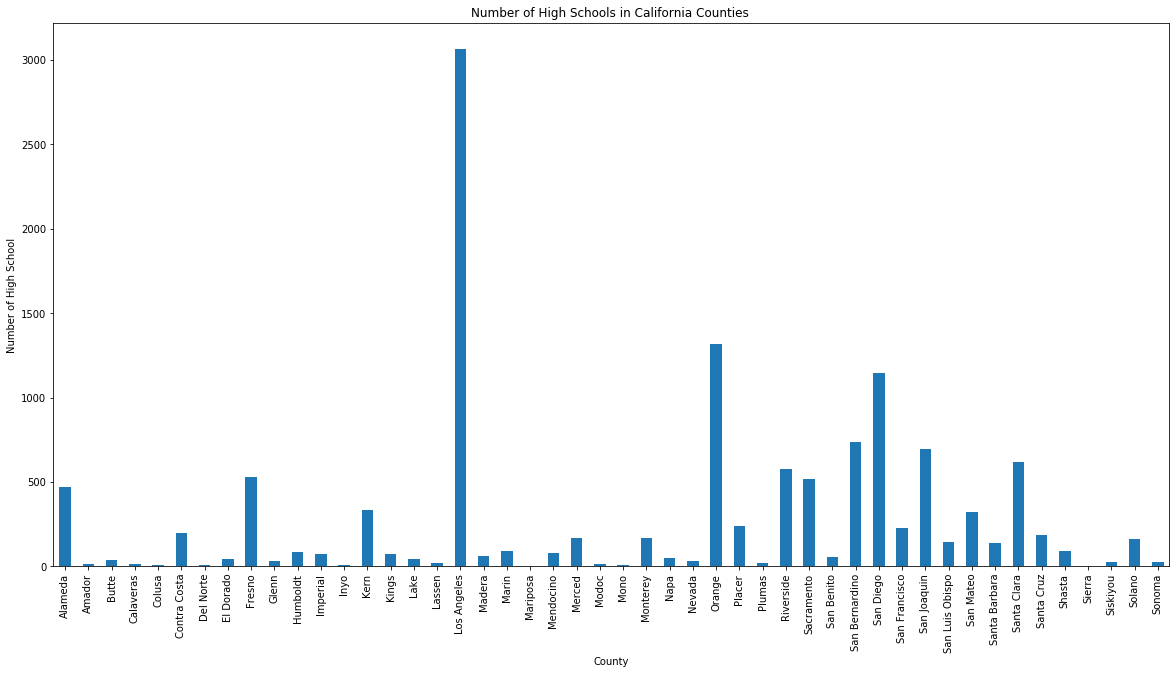

In [312]:
school_number = high19.groupby(["County"])["School"].count()
ax = school_number.plot(kind="bar", figsize=(20, 10) )
ax.set_title("Number of High Schools in California Counties ")
ax.set_xlabel("County")
ax.set_ylabel("Number of High School")
ax.figure.savefig("CaliforniaHighSchoolNumber.png")




In [248]:
pl_high19 = high19.loc[high19["County"] == "Placer" ]

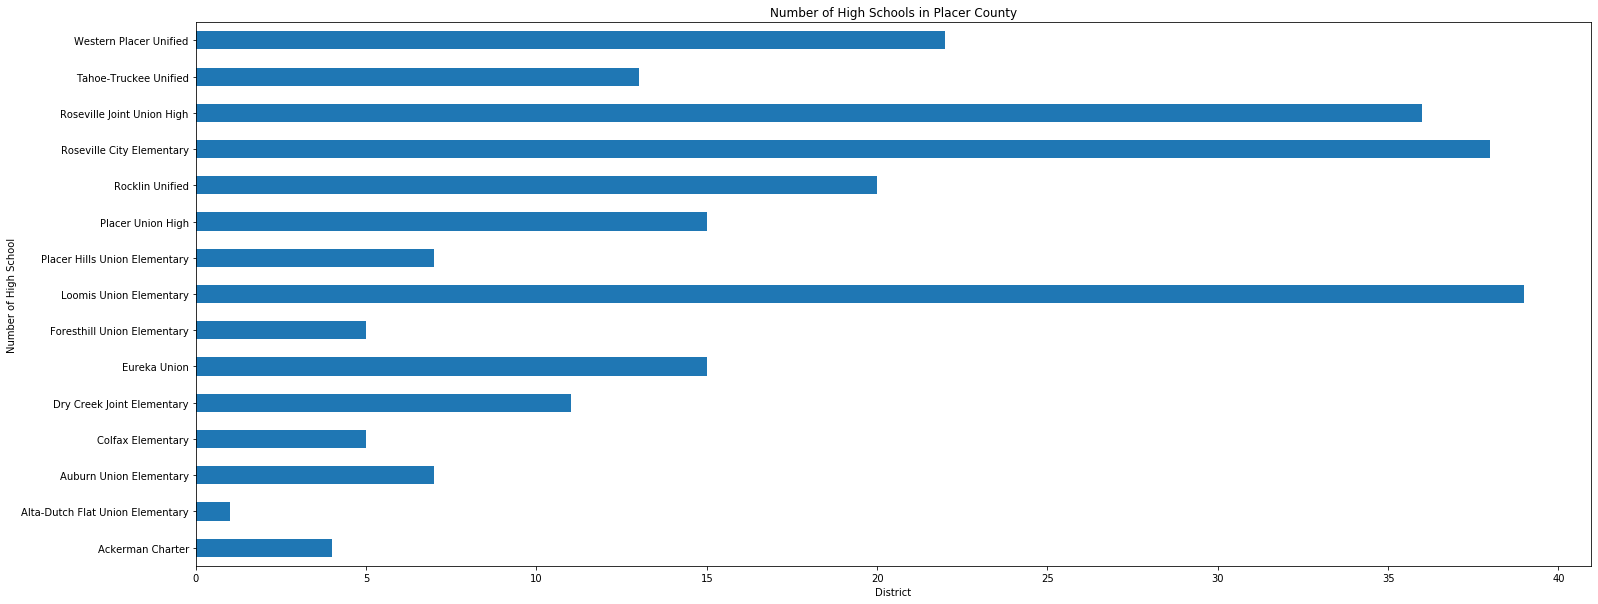

In [311]:
school_number = pl_high19.groupby(["District"])["School"].count()
ax = school_number.plot(kind="barh", figsize=(25, 10) )
ax.set_title("Number of High Schools in Placer County")
ax.set_xlabel("District")
ax.set_ylabel("Number of High School")
ax.figure.savefig("PlacerHighSchoolNumber.png")


# Merge and Average Scores of Last for Years 2016 - 2019

In [211]:
df2019["Mean Scale Score 16"] = results17["Mean Scale Score"]

In [212]:
df2019["Mean Scale Score 17"] = results18["Mean Scale Score"]

In [213]:
df2019["Mean Scale Score 18"] = results19["Mean Scale Score"]

In [215]:
df2019["Ave Score of Last Four Years"]=(df2019["Mean Scale Score"]+df2019["Mean Scale Score 16"]+
                                        df2019["Mean Scale Score 17"]+df2019["Mean Scale Score 18"])/4

In [216]:
df2019.columns

Index(['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet',
       'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext',
       'WebSite', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum',
       'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'Latitude',
       'Longitude', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2',
       'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3',
       'LastUpDate', 'Test Id', 'Grade', 'Students Tested', 'Mean Scale Score',
       'Subgroup ID', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Mean Scale Score 16',
       'Mean Scale Score 17', 'Mean Scale Score 18',
       'Ave Score of La

In [217]:
df2019 = df2019.dropna()

In [219]:
dfhigh = df2019.loc[(df2019["Grade"] == 7) | (df2019["Grade"] == 8) | (df2019["Grade"] == 11)]

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

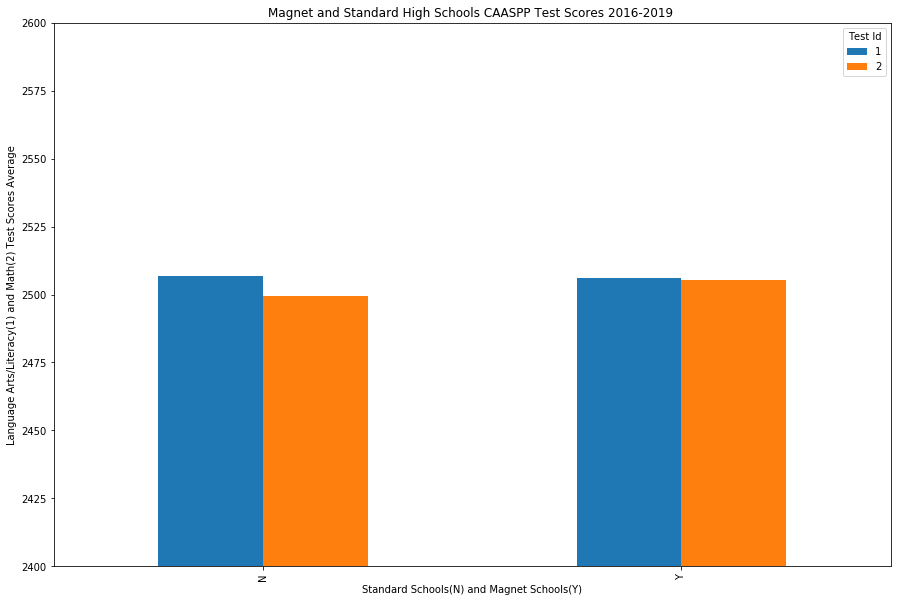

In [227]:
ax = dfhigh.groupby(['Magnet','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Magnet and Standard High Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("MagnetHighSchoolPerformance1.png")
plt.xlabel("Standard Schools(N) and Magnet Schools(Y)")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

In [85]:
dfelem = df2019.loc[((df2019["Grade"] == 3) | (df2019["Grade"] == 4) | (df2019["Grade"] == 5) | (df2019["Grade"] == 6) | 
                     (df2019["Grade"] == 7) | (df2019["Grade"] == 8))]

In [88]:
dfelem = dfelem.dropna()

Text(98.5, 0.5, 'Language Arts/Literacy(1) and Math(2) Test Scores Average')

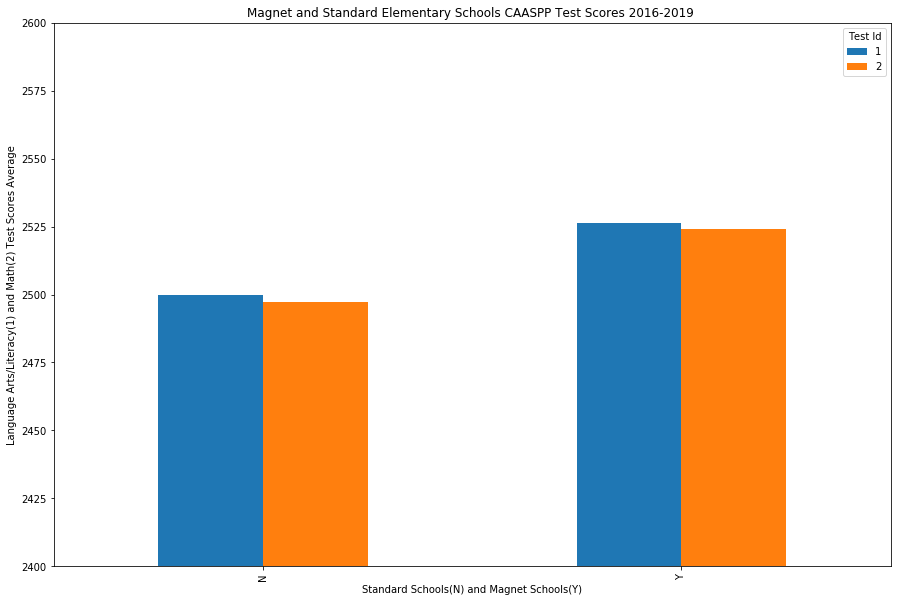

In [241]:
ax = dfelem.groupby(['Magnet','Test Id'])['Ave Score of Last Four Years'].mean().unstack('Test Id').plot(kind="bar", figsize=(15,10))
ax.set_ylim(2400,2600)
plt.title("Magnet and Standard Elementary Schools CAASPP Test Scores 2016-2019 ")
plt.savefig("MagnetElementarySchoolPerformance1.png")
plt.xlabel("Standard Schools(N) and Magnet Schools(Y)")
plt.ylabel("Language Arts/Literacy(1) and Math(2) Test Scores Average")

In [274]:
plahigh19 = df2019.loc[(df2019["EILCode"] == "HS")]

In [275]:
dfhigh_pla = plahigh19.loc[dfhigh["County"] == "Placer"]

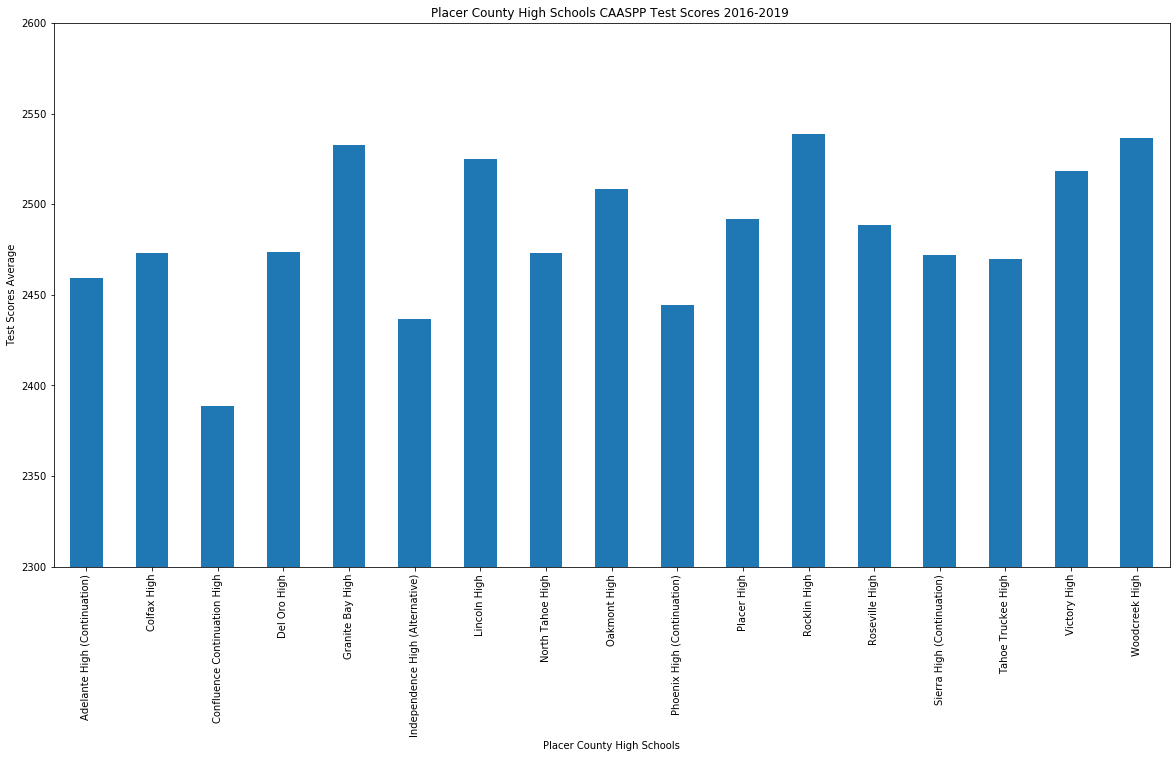

In [291]:
ax = dfhigh_pla.groupby("School")["Ave Score of Last Four Years"].mean().plot(kind="bar", figsize=(20,10))
ax.set_ylim(2300,2600)
ax.set_title("Placer County High Schools CAASPP Test Scores 2016-2019 ")
ax.set_xlabel("Placer County High Schools")
ax.set_ylabel("Test Scores Average")
ax.figure.savefig("PlacerHighSchoolSuccess.png")

In [304]:
pla_hs_successlevels = dfhigh_pla.groupby(["School"])[["School","Percentage Standard Exceeded",
       "Percentage Standard Met","Percentage Standard Nearly Met",
       "Percentage Standard Not Met"]].mean()

In [305]:
pla_hs_successlevels.head()

,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met
School,,,,
Adelante High (Continuation),0.000000,0.697143,5.982857,93.320000
Colfax High,13.055000,18.825000,39.575000,28.545000
Confluence Continuation High,0.000000,0.000000,4.165000,95.835000
Del Oro High,13.640000,28.177143,33.462857,24.721429
Granite Bay High,49.121667,32.263333,13.996667,4.615000


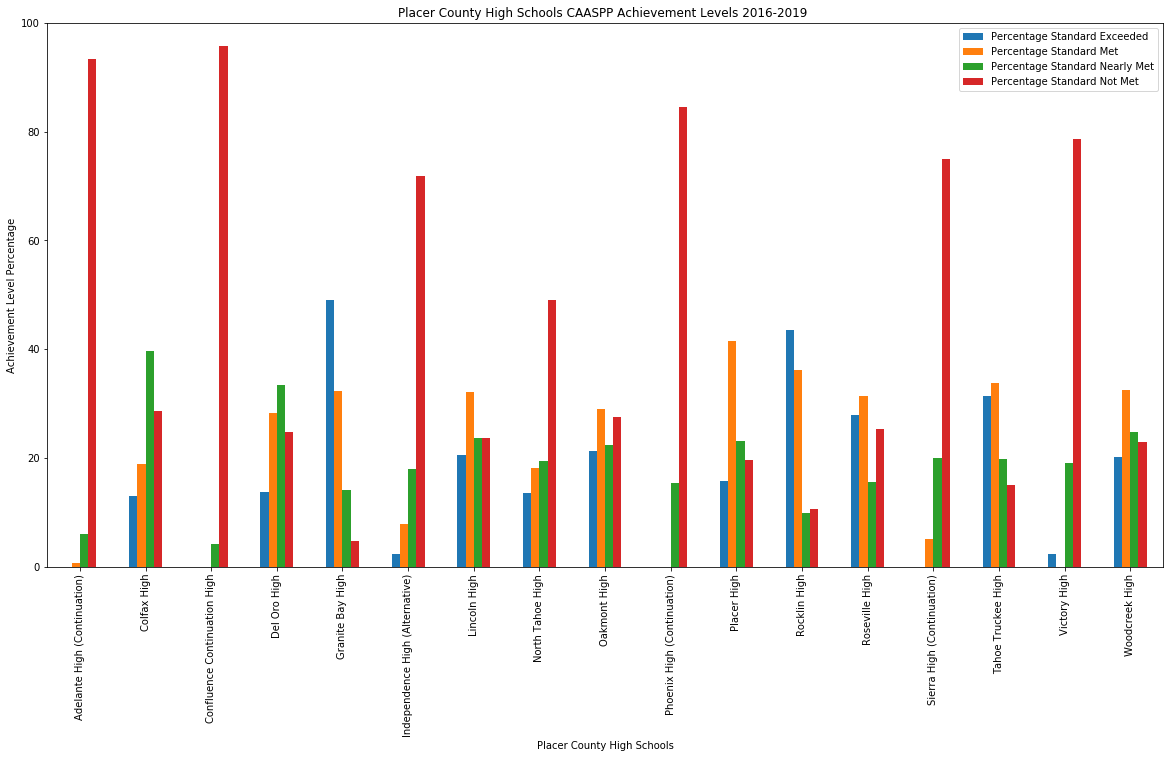

In [307]:
ax = pla_hs_successlevels.plot(kind="bar", figsize=(20,10))
ax.set_ylim(0,100)
ax.set_title("Placer County High Schools CAASPP Achievement Levels 2016-2019 ")
ax.set_xlabel("Placer County High Schools")
ax.set_ylabel("Achievement Level Percentage")
ax.figure.savefig("PlacerHighSchoolSuccessLevels.png")

